In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [27]:
path = 'data'
csv_files = glob.glob(path + "/*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

data = pd.concat(df_list, axis = 0)

df = data.copy()

df.shape

(5689, 52)

In [28]:
df = df.drop(['id','object', 'annonce_id', 'agency_id', 'agency_page', 'agency_contact_name', 'agency_img_url',
        'agency_phone_number', 'agency_has_email', 'agency_link', 'contact_email', 'description', 'is_redirected',
        'is_expired', 'latitude', 'longitude', 'picture_count', 'photos', 'price_decrease_percent', 'publication_id',
        'pricing_price_note', 'ref', 'title', 'url', 'video_url', 'virtual_visit_url', 'collected_at', 'input_url',
        'input_max_pages', 'input_annonce_details','main_picture','transaction_type', 'short_description', 
             'price_per_meter', 'is_exclusive', 'monthly_price', 'nature', 'estate_type_id', 
              'highlighting_level', 'address', 'bedrooms_count','rooms', 'contact_is_private_seller','business_unit'
              , 'insee_code','position'],
             axis = 1)
df.shape

(5689, 6)

In [29]:
df = df.drop_duplicates().reset_index().drop(['index'], axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         3156 non-null   float64
 1   district     2377 non-null   object 
 2   estate_type  3169 non-null   object 
 3   postal_code  3169 non-null   int64  
 4   price        3169 non-null   int64  
 5   tags         3169 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 148.7+ KB


In [31]:
#splitting the 'tags' column
#what are all the unique features we can find in it

tag_words = ''
for data in df['tags']:
    tag_words = tag_words + data + ","

unique = []
for word in tag_words.split(","):
    if word not in unique:
        unique.append(word)
        
unique.sort(reverse=True)
print(unique)


['– pièces', '9 pièces', '8 pièces', '7 pièces', '6 pièces', '5 pièces', '4 pièces', '3 pièces', '2 pièces', '11 pièces', '10 pièces', '1 pièce', '0 pièce', ' – m²', ' Étage –/9', ' Étage –/7', ' Étage –/6', ' Étage –/5', ' Étage –/4', ' Étage –/3', ' Étage –/2', ' Étage –/1', ' Étage –/0', ' Étage 9/–', ' Étage 9/9', ' Étage 9/26', ' Étage 9/17', ' Étage 9/15', ' Étage 9/13', ' Étage 9/12', ' Étage 9/11', ' Étage 9/10', ' Étage 8/–', ' Étage 8/9', ' Étage 8/8', ' Étage 8/15', ' Étage 8/14', ' Étage 8/12', ' Étage 8/10', ' Étage 8/0', ' Étage 7/–', ' Étage 7/9', ' Étage 7/8', ' Étage 7/7', ' Étage 7/4', ' Étage 7/11', ' Étage 7/10', ' Étage 7/0', ' Étage 6/–', ' Étage 6/9', ' Étage 6/8', ' Étage 6/7', ' Étage 6/6', ' Étage 6/3', ' Étage 6/16', ' Étage 6/14', ' Étage 6/13', ' Étage 6/10', ' Étage 6/0', ' Étage 5/–', ' Étage 5/9', ' Étage 5/8', ' Étage 5/7', ' Étage 5/6', ' Étage 5/5', ' Étage 5/4', ' Étage 5/15', ' Étage 5/14', ' Étage 5/11', ' Étage 5/10', ' Étage 5/1', ' Étage 5/0', '

In [32]:
#list of the features we can find in 'tags'
#rooms and area are already in the data, so I do not keep them here

features = {'pièce': 'rooms', 'balcon':'balcony', 'ascenseur':'elevator', 
                 'terrasse':'terrace', "étage" : 'floor', 'jardin' : "garden", 
                 'garage' : 'garage','parking' : 'parking_spot', 'box' : 'box' }


def split_column(features, dataframe, column_to_split ):
    
    for key in features :
        list_temp = []

        for data in dataframe[column_to_split] :

                if key.lower() in data.lower() :
                    splited_data = data.split(",")
                    
                    for element in splited_data:
                        
                        if key.lower() in element.lower():
                            list_temp.append(element)
                else :
                    list_temp.append(None)
        dataframe[features[key]] = list_temp


In [33]:
split_column(features, df, 'tags')

In [34]:
df = df.drop(['tags'], axis = 1)

In [35]:
df.tail(3)

,area,district,estate_type,postal_code,price,rooms,balcony,elevator,terrace,floor,garden,garage,parking_spot,box
3166,88.003705,Point du Jour-Ménival,Appartement,69005,380000,4 pièces,Balcon,Ascenseur,None,Étage 1/5,None,None,None,Box
3167,70.478723,Champvert-Point du Jour-Saint Irénée,Appartement,69005,265000,3 pièces,None,Ascenseur,None,Étage 11/15,None,None,None,None
3168,75.000000,NaN,Appartement,69005,270000,3 pièces,None,None,None,Étage 0/0,None,None,Parking,None


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3156 non-null   float64
 1   district      2377 non-null   object 
 2   estate_type   3169 non-null   object 
 3   postal_code   3169 non-null   int64  
 4   price         3169 non-null   int64  
 5   rooms         3169 non-null   object 
 6   balcony       973 non-null    object 
 7   elevator      1824 non-null   object 
 8   terrace       593 non-null    object 
 9   floor         2908 non-null   object 
 10  garden        188 non-null    object 
 11  garage        216 non-null    object 
 12  parking_spot  521 non-null    object 
 13  box           519 non-null    object 
dtypes: float64(1), int64(2), object(11)
memory usage: 346.7+ KB


In [37]:
#creating 3 categories of floor
#Ground floor, Last floor, or Neither

list_floor = []

for floor in df['floor'] :
    
    if floor == None :
        list_floor.append('Other')
    elif (str(floor.replace('Étage ',''))[1] == '0'):
        list_floor.append('Ground Floor')
    elif (str(floor.replace('Étage ',''))[1] == str(floor.replace('Étage ',''))[3]) :
        list_floor.append('Last Floor')
    else :
        list_floor.append('Other')

        
df['floor'] = list_floor 

df['floor'].value_counts(normalize=True)

Other           0.746608
Last Floor      0.133481
Ground Floor    0.119912
Name: floor, dtype: float64

In [38]:
df['area'] = df['area'].values.round()

In [39]:
#I want to use this column to know if the flat is new or not

df['estate_type'].value_counts(normalize = True)
list_new = []

for estate_type in df['estate_type']:
    if 'neuf' in estate_type.lower() :
       list_new.append(True)
    else : 
        list_new.append(False)
        
df['new_flat'] = list_new

In [40]:
df = df.drop(['estate_type'], axis = 1)

In [41]:
df['new_flat'].value_counts(normalize=True)

False    0.894288
True     0.105712
Name: new_flat, dtype: float64

In [42]:
#list of all features I will keep on True/False option

list_t_f_features = ['balcony', 'elevator', 'garden', 'terrace', 'garage', 'box', 'parking_spot']

def true_false(dataframe, column) :
    dataframe[column] = dataframe[column].notnull().astype(bool)
    dataframe[column] = dataframe[column].fillna(False)

In [43]:
for features in list_t_f_features :
    true_false(df, features)

In [44]:
#merging box and garage
df['garage'] = df['garage'] | df['box'] 

df = df.drop(['box'], axis = 1)

In [45]:
df

,area,district,postal_code,price,rooms,balcony,elevator,terrace,floor,garden,garage,parking_spot,new_flat
0,19.0,Croix Paquet,69001,175000,1 pièce,False,False,False,Other,False,False,False,False
1,19.0,La Guillotière Sud,69007,133000,1 pièce,False,False,False,Other,False,True,False,False
2,39.0,NaN,69006,237000,2 pièces,True,True,True,Other,False,False,False,False
3,99.0,Montchat,69003,755000,5 pièces,True,True,False,Other,False,True,False,False
4,48.0,Montchat,69003,220000,2 pièces,True,False,True,Ground Floor,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3164,45.0,NaN,69005,295000,2 pièces,True,False,False,Other,False,False,False,False
3165,58.0,NaN,69005,219000,3 pièces,True,True,False,Other,False,False,False,False
3166,88.0,Point du Jour-Ménival,69005,380000,4 pièces,True,True,False,Other,False,True,False,False
3167,70.0,Champvert-Point du Jour-Saint Irénée,69005,265000,3 pièces,False,True,False,Other,False,False,False,False


In [46]:
#area and district have missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3156 non-null   float64
 1   district      2377 non-null   object 
 2   postal_code   3169 non-null   int64  
 3   price         3169 non-null   int64  
 4   rooms         3169 non-null   object 
 5   balcony       3169 non-null   bool   
 6   elevator      3169 non-null   bool   
 7   terrace       3169 non-null   bool   
 8   floor         3169 non-null   object 
 9   garden        3169 non-null   bool   
 10  garage        3169 non-null   bool   
 11  parking_spot  3169 non-null   bool   
 12  new_flat      3169 non-null   bool   
dtypes: bool(7), float64(1), int64(2), object(3)
memory usage: 170.3+ KB


In [47]:
#area has very few missing data, I can drop those few rows
df = df.dropna(subset=['area'])

In [48]:
df = df.loc[df['rooms']!='0 pièce']

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3155 entries, 0 to 3168
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3155 non-null   float64
 1   district      2366 non-null   object 
 2   postal_code   3155 non-null   int64  
 3   price         3155 non-null   int64  
 4   rooms         3155 non-null   object 
 5   balcony       3155 non-null   bool   
 6   elevator      3155 non-null   bool   
 7   terrace       3155 non-null   bool   
 8   floor         3155 non-null   object 
 9   garden        3155 non-null   bool   
 10  garage        3155 non-null   bool   
 11  parking_spot  3155 non-null   bool   
 12  new_flat      3155 non-null   bool   
dtypes: bool(7), float64(1), int64(2), object(3)
memory usage: 194.1+ KB


In [50]:
#I sort the DF to have the same postal codes together

sorted_df = df.sort_values('postal_code')

In [51]:
#I refill the Nan of district by the last district on the list

sorted_df['district'].fillna(method='bfill', inplace = True)

In [52]:
sorted_df['district'].isna().sum().any()

False

In [53]:
df = sorted_df.sort_values('price').reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          3155 non-null   float64
 1   district      3155 non-null   object 
 2   postal_code   3155 non-null   int64  
 3   price         3155 non-null   int64  
 4   rooms         3155 non-null   object 
 5   balcony       3155 non-null   bool   
 6   elevator      3155 non-null   bool   
 7   terrace       3155 non-null   bool   
 8   floor         3155 non-null   object 
 9   garden        3155 non-null   bool   
 10  garage        3155 non-null   bool   
 11  parking_spot  3155 non-null   bool   
 12  new_flat      3155 non-null   bool   
dtypes: bool(7), float64(1), int64(2), object(3)
memory usage: 169.6+ KB


## End of Global Data Cleaning / Analysis

 ## Preprocessing

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
encoder = LabelEncoder()

In [56]:
for data in df[['balcony', 'elevator', 'terrace', 'garden', 'garage', 'parking_spot', 'new_flat']]:
    df[data] = encoder.fit_transform(df[data])

for data in df[['postal_code', 'district', 'rooms', 'floor']]:
    df = df.join(pd.get_dummies(df[data])).drop([data], axis = 1)
    


In [57]:
pd.set_option('display.max_column',52)
df[df['9 pièces'] == True]

,area,price,balcony,elevator,terrace,garden,garage,parking_spot,new_flat,69001,69002,69003,69004,69005,69006,69007,69008,69009,Bellecour-Ainay,Champvert-Point du Jour-Saint Irénée,Cordeliers-Célestins-Bourse,Croix Paquet,Croix Rousse-Centre,Croix Rousse-Gros Caillou,Fourvière-Saint Just,Gerland,...,Plateau de la Croix Rousse-Saône,Point du Jour-Ménival,Saint Rambert,Saint Vincent,Sans Souci-Dauphiné,Terreaux,Transvaal,Tête d'Or-Foch-Vitton,Vaise-Rochecardon-Industrie,Vieux Lyon,Villette,États-Unis,1 pièce,10 pièces,11 pièces,2 pièces,3 pièces,4 pièces,5 pièces,6 pièces,7 pièces,8 pièces,9 pièces,Ground Floor,Last Floor,Other
2989,204.0,850000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3129,231.0,1490000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3153,384.0,2950000,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [58]:
#since what is inside the flat seems more important than the location, I will only keep the districts
df.drop([69001,69002,69003,69004,69005,69006,69007,69008,69009], axis = 1, inplace= True)
df.columns = df.columns.astype(str)

In [59]:
pd.set_option('display.max_column',62)
final_df = df[df['price'] < 1000000]
final_df.shape

(3068, 59)

In [60]:
#normalize the price column
#df['price'] = np.log(df['price'] + 1)

In [61]:
#df['price'].hist(figsize=(10,5))

## Machine Learning Model

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
seed = 42

In [64]:
X = final_df.drop(['price'], axis = 1)
y = final_df['price']

X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, train_size=0.8, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=seed)

In [96]:
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler, minmax_scale

In [89]:
r_forest = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1,20),
             'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(r_forest, param_grid, cv = 5)

In [90]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [97]:
predictions = grid.predict(X_val)
model = grid.best_estimator_

In [98]:
mean_absolute_error(predictions, y_val)

59495.94679695982

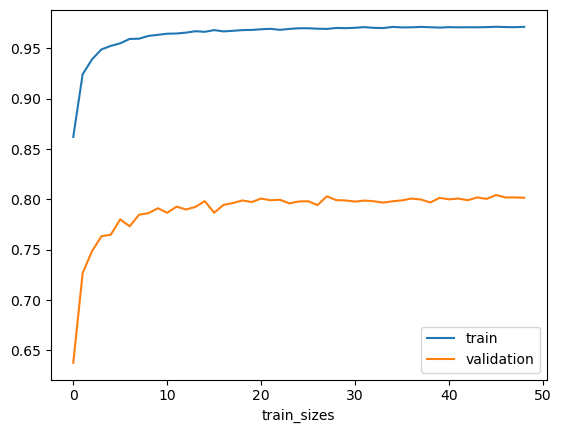

In [102]:
 train_score, val_score, learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.1, 1.0, 20), cv = 5 )

print()
plt.plot(train_score.mean(axis=1), label = 'train')
plt.plot( val_score.mean(axis=1), label = 'validation')
plt.xlabel('train_sizes')
plt.legend()

In [45]:
import pickle

In [46]:
#pickle.dump(r_forest, open('model.pkl', 'wb'))